# Chapter 1.2 Anatomy of a Qubit

We start with its most fundamental unit: the **qubit**. Unlike a classical bit, which is either a 0 or a 1, a qubit lives in a richer mathematical world. It doesn't just *choose* between 0 and 1—it can *blend* them.

This blending happens in a complex vector space, and to describe it, physicists use **Dirac notation**, a sleek and powerful shorthand. A quantum state is written as a **ket**, like this: $|\psi\rangle$. Think of it as the quantum version of a column vector. T

Let's begin with the two building blocks of every qubit.

### The Computational Basis

The **computational basis** consists of two orthonormal states, denoted $|0\rangle$ and $|1\rangle$. These are like the "North" and "South" poles of a qubit's world.

* The **zero state**, $|0\rangle$, is represented as:

  $$
  |0\rangle = \begin{pmatrix} 1\\ 0\end{pmatrix}
  $$

  This is the state we might think of as analogous to the classical bit 0.

* The **one state**, $|1\rangle$, is:

  $$
  |1\rangle = \begin{pmatrix} 0\\ 1\end{pmatrix}
  $$

  This plays the role of the classical 1.

Let's import necessary packages and write down their exact definition in Python:

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la
from IPython.display import display, Latex
from qsip.visualization.bloch import Bloch

zero_state = np.array([[1.0], [0.0]]) # ket
one_state = np.array([[0.0], [1.0]]) # ket
print(zero_state)
print(one_state)

[[1.]
 [0.]]
[[0.]
 [1.]]


### The dual vector


In Dirac notation, every **ket** $|\psi\rangle$ (a column vector) has a corresponding **bra** $\langle \psi|$, which is its **transpose conjugate**.

Mathematically:

$$
\langle \psi| = \left(|\psi\rangle\right)^\dagger
$$

If:

$$
|\psi\rangle = \begin{pmatrix} a \\ b \end{pmatrix},
\quad \text{then} \quad
\langle \psi| = \begin{pmatrix} \bar{a} & \bar{b} \end{pmatrix}
$$

The **bra–ket** inner product $\langle \phi|\psi\rangle$ results in a complex scalar, and forms the backbone of quantum probability amplitudes and expectation values.

Following this, we can define $\langle 0|$ and $\langle 1|$:

In [2]:
zero_state_bra = zero_state.conj().T  # Transpose conjugate of |0⟩
one_state_bra = one_state.conj().T  # Transpose conjugate of |1⟩
print(zero_state_bra)
print(one_state_bra)

[[1. 0.]]
[[0. 1.]]


### Superposition: The Quantum Blend

A qubit can be in a state that's *simultaneously* a little bit $|0\rangle$ and a little bit $|1\rangle$. Not in a vague metaphorical way, but as a precise mathematical reality. Any **pure** qubit state (we will talk about non-pure, or mixed, states later) can be written as:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

Here, $\alpha$ and $\beta$ are complex numbers, and they must satisfy the normalization condition:

$$
|\alpha|^2 + |\beta|^2 = 1
$$

$|\alpha|^2$ and $|\beta|^2$ are interpreted as the probability of finding  the qubit in $|0\rangle$ and  $\beta|1\rangle$, respectively. This condition ensures that the total probability of finding the qubit in *some* state when measured is 100%.


### The Plus and Minus States

To showcase the power of superposition, let's look at two special states:

* The **plus state**:

  $$
  |+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}
  $$

  This state is an equal blend of $|0\rangle$ and $|1\rangle$. When measured in the computational basis, it yields either outcome with equal probability.

* The **minus state**:

  $$
  |-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}
  $$

  Here, the same amplitudes appear, but with opposite signs. This subtle change leads to very different behavior under certain quantum operations.

Together, $|+\rangle$ and $|-\rangle$ form the so-called **Hadamard basis**, an alternative to the computational basis that's essential in many quantum algorithms. 
$$

In [3]:
# Define a utility function to normalize any quantum state
def normalize(state_vector):
    """Normalize a quantum state to ensure total probability is 1."""
    return state_vector / la.norm(state_vector)

# Create a superposition: the |+> state
plus_state = normalize(zero_state + one_state)
minus_state = normalize(zero_state - one_state)

# Display the results

print("Plus state:\n", plus_state)
print("Minus state:\n", minus_state)

Plus state:
 [[0.70710678]
 [0.70710678]]
Minus state:
 [[ 0.70710678]
 [-0.70710678]]


Similarly, we can define $\langle + |$ and $\langle - |$:

In [4]:
plus_state_bra = plus_state.conj().T
minus_state_bra = minus_state.conj().T

### The $|i\rangle$ and $|-i\rangle$ States

In addition to the familiar superposition states $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$, we can also define superpositions with **complex relative phase**. Two particularly important examples are:

$$
|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle), \quad |-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)
$$

They are equal-weight superpositions of $|0\rangle$ and $|1\rangle$, just like $|+\rangle$ and $|-\rangle$, but with a relative phase difference of $\pm \frac{\pi}{2}$. These phase-shifted states also play an important role in quantum computing, for reasons that we will know about very soon.


In [5]:
# Define |i⟩ and |-i⟩
i_state = normalize(zero_state + 1j * one_state)
minus_i_state = normalize(zero_state - 1j * one_state)

# Print the states
print("|i⟩ =\n", i_state)
print("|-i⟩ =\n", minus_i_state)

|i⟩ =
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]]
|-i⟩ =
 [[0.70710678+0.j        ]
 [0.        -0.70710678j]]


## The Global Phase

Quantum mechanics is indifferent to a state's overall complex phase. That is, the states $|\psi\rangle$ and $e^{i\alpha}|\psi\rangle$ are considered physically equivalent—they produce identical measurement outcomes and interfere identically with all other states.

This global phase $e^{i\alpha}$ has no observable consequences and is thus factored out when describing the physical state space of a qubit. What remains are two real degrees of freedom, which we can parametrize with angular coordinates.

## Inner Products and Orthonormality

The inner product is a central concept in quantum mechanics. It captures the overlap, or “similarity” between two quantum states, and determines the probability of one being observed when the other is measured.

If you take two arbitrary states, say $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ and $|\phi\rangle = \gamma|0\rangle + \delta|1\rangle$, their inner product is:

$$
\langle \phi | \psi \rangle = \bar{\gamma}\alpha + \bar{\delta}\beta
$$

The inner product measures how "aligned" the two states are—how much one overlaps with the other.

As an example, the inner product of $| 0 \rangle $ and $| 1 \rangle $ is:

$$
\langle 0 | 1 \rangle = 0, \quad \langle 0 | 0 \rangle = \langle 1 | 1 \rangle = 1
$$

This tells us that $|0\rangle$ and $|1\rangle$ are not only orthogonal but also normalized—hence, an orthonormal basis.

In [6]:
# Inner product of |0> and |1>
print("⟨0|0⟩ =", np.vdot(zero_state_bra, zero_state))  # Should be 1
print("⟨0|1⟩ =", np.vdot(zero_state_bra, one_state))  # Should be 0


⟨0|0⟩ = 1.0
⟨0|1⟩ = 0.0


Just like $|0\rangle$ and $|1\rangle$, $| + \rangle $ and $| - \rangle $ are orthonormal:

$$
\langle + | - \rangle = 0, \quad \langle + | + \rangle = \langle - | - \rangle = 1
$$

In [7]:
inner_pm = np.vdot(plus_state_bra, minus_state)
print("⟨+|−⟩ =", inner_pm)
print("Overlap squared =", abs(inner_pm)**2)


⟨+|−⟩ = -2.2371143170757382e-17
Overlap squared = 5.004680467665246e-34


Similarly, we can compute $| i \rangle$ and $| -i \rangle$:

In [8]:
inner_pm_i = np.vdot(i_state.conj().T, minus_i_state)
print("⟨+|−⟩ =", inner_pm_i)
print("Overlap squared =", abs(inner_pm_i)**2)


⟨+|−⟩ = (0.9999999999999998+0j)
Overlap squared = 0.9999999999999996


As an example, we can also calculate the overlap of $| + \rangle$ and $| 0 \rangle$:

In [9]:
# Inner product of |+> and |0>
# Define normalized superposition state
# Compute overlap
inner = np.vdot(plus_state_bra, zero_state)
probability = abs(inner)**2

print("⟨0|+⟩ =", inner)
print("Probability of measuring |0⟩ from |+⟩ =", probability)


⟨0|+⟩ = 0.7071067811865475
Probability of measuring |0⟩ from |+⟩ = 0.4999999999999999


It can be seen that $| + \rangle$ and $| 0 \rangle$ do not overlap.

## The Bloch Sphere

Now that we've seen how a qubit can be written as a linear combination of $|0\rangle$ and $|1\rangle$, it's time to give that abstract vector a shape. The **Bloch sphere** is the geometric stage where single-qubit states come to life.

Up to global phase, any pure qubit state can be written in the form:

$$
|\psi\rangle = a|0\rangle + b|1\rangle, \quad a, b \in \mathbb{C}, \quad |a|^2 + |b|^2 = 1
$$

While this form is mathematically complete, the two complex numbers $a$ and $b$ contain more information than we physically need. Quantum mechanics allows us to **ignore the global phase** of a state—any overall complex factor of the form $e^{i\alpha}$ leaves measurement outcomes unchanged.

This allows us to reparameterize the state using just two real angles, $\theta$ and $\phi$:

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

Here:

* $\theta \in [0, \pi]$ is the **colatitude** (the angle from the north pole, or $|0\rangle$).
* $\phi \in [0, 2\pi)$ is the **azimuthal angle** (longitude in the $x$–$y$ plane).

With this representation, each pure qubit state corresponds to a point on the surface of a unit sphere in 3D space—the **Bloch sphere**.

### The Bloch Vector

To visualize this mapping explicitly, we associate the state $|\psi\rangle$ with a unit vector in $\mathbb{R}^3$:

$$
\hat{n} = 
\begin{pmatrix}
\sin\theta \cos\phi \\
\sin\theta \sin\phi \\
\cos\theta
\end{pmatrix}
$$

This **Bloch vector** $\hat{n}$ captures the full physical content of the qubit (excluding global phase). It allows us to visualize quantum states as points on the sphere and quantum gates as rotations of that vector.

For example:

* The state $|0\rangle$ corresponds to the **north pole**: $(0, 0, 1)$
* The state $|1\rangle$ sits at the **south pole**: $(0, 0, -1)$
* The state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ lies on the **equator**, pointing along the x-axis: $(1, 0, 0)$
* The state $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ lies along the **negative x-axis**: $(-1, 0, 0)$

### Why It Matters

The Bloch sphere is more than just a pretty picture—it provides a powerful visual language. Single-qubit gates become rotations of the sphere, and quantum algorithms often reduce to navigating paths across its surface.

Understanding this geometry builds the foundation for interpreting quantum dynamics, visualizing entanglement, and designing quantum circuits that do more than shuffle symbols—they reshape space.

> **Reminder:** The global phase $e^{i\alpha}$ is not reflected on the Bloch sphere because it has no observable effect. Only the *relative* phase between $|0\rangle$ and $|1\rangle$ has physical meaning.

We can present all 6 key qubit states on the Bloch sphere:

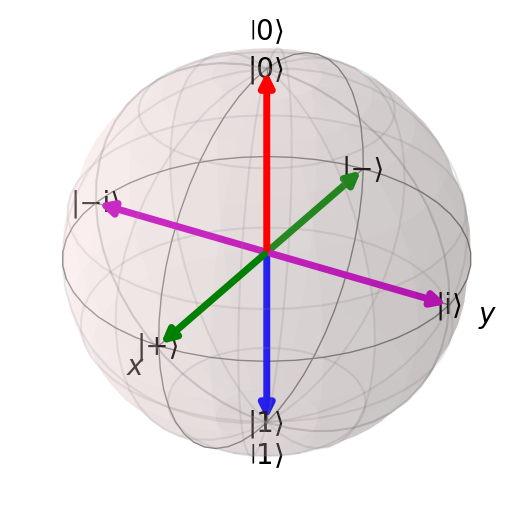

In [10]:
import numpy as np
from qiskit.visualization.bloch import Bloch

# Define Bloch vector from θ and φ
def bloch_vector(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return [x, y, z]

# Define Bloch coordinates for six states
states = {
    '|0⟩':  (0, 0),                  # north pole
    '|1⟩':  (np.pi, 0),              # south pole
    '|+⟩':  (np.pi/2, 0),            # x-axis
    '|−⟩':  (np.pi/2, np.pi),        # -x-axis
    '|i⟩':  (np.pi/2, np.pi/2),      # y-axis
    '|−i⟩': (np.pi/2, 3*np.pi/2),    # -y-axis
}

# Initialize Bloch sphere
b = Bloch()
b.vector_color = ['r', 'b', 'g', 'g', 'm', 'm']

# Add vectors to Bloch sphere
for label, (theta, phi) in states.items():
    vec = bloch_vector(theta, phi)
    b.add_vectors(vec)
    b.add_annotation(vec, text=label)

b.render()


Note that **orthogonal quantum states do not  appear as perpendicular vectors on the Bloch sphere**. The Bloch sphere represents qubit states as points on the surface of a 3D unit sphere, but the actual Hilbert space in which these states live is a complex vector space. In fact, any pair of antipodal points on the Bloch sphere represents orthogonal states. While the Bloch sphere is a powerful tool for visualizing qubit states and their dynamics, it doesn't faithfully represent **linear orthogonality** as angles between vectors in the traditional Euclidean sense.


We can also draw any arbitrary states.

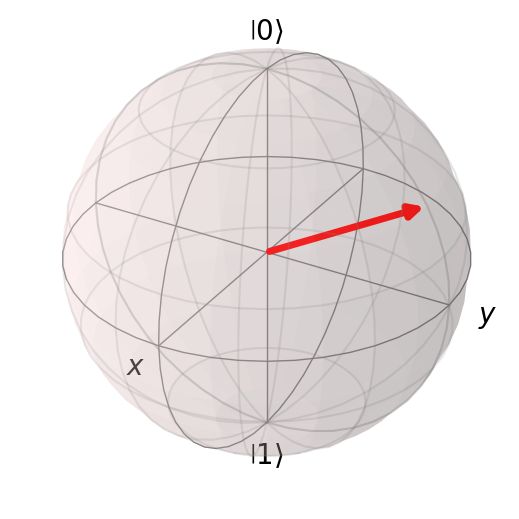

In [11]:
# Define Bloch vector from θ and φ
def bloch_vector(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return [x, y, z]

# Angles in radians
theta = np.pi / 3  # 60 degrees
phi = np.pi / 2    # 90 degrees

# Get the vector
vec = bloch_vector(theta, phi)

# Create Bloch sphere and add vector using qsip
b = Bloch()
b.vector_color = ['r']  # Optional: set vector color
b.add_vectors(vec)
b.show()  # This will render the Bloch sphere

## Summary

In this section, we explored the anatomy of a single qubit—from its computational basis states $|0\rangle$ and $|1\rangle$, to superpositions like $|+\rangle$, $|-\rangle$, $|i\rangle$, and $|-i\rangle$, and the geometry of the Bloch sphere. We saw how global phase plays no role in physical predictions, and how the Bloch sphere provides a compact, intuitive way to visualize qubit states. We also examined the role of inner products and orthogonality, noting their subtle relationship with Bloch sphere geometry.

In the next section, we'll turn our attention to **what we can do** with a single qubit: introducing **1-qubit gates** and how they act as rotations on the Bloch sphere.
